# Smart Resume-to-Job Matching Engine
### Portfolio Project: HR Analytics & Natural Language Processing (NLP)

**Objective:** To automate the initial screening process by calculating a match score between a specific Job Description and a pool of candidates using Python and `pandas`.

---
## 1. Data Initialization
In this step, we define our **Target Job** and our **Candidate Pool**. 
- We use a separate variable for the Job Description.
- We use a **pandas DataFrame** for candidates because it allows for structured, tabular manipulation of skills and experience.

In [9]:
import pandas as pd

# 1. Define the Job Description (The 'Target')
# We mix Hard Skills (Python, SQL) with Soft Skills (Leadership)
job_description = "Seeking a Data Analyst with expertise in Python, SQL, Tableau, and strong Leadership skills."

# 2. Create the Candidate Dataset
# Note: We include variations in how skills are written to test our logic later
data = {
    'Candidate_Name': ['Sahil Kumar', 'Alex Smith', 'Jordan Lee', 'Taylor Wong'],
    'Years_Exp': [3, 5, 2, 8],
    'Skills': [
        'Python, SQL, Tableau, Stakeholder Management', # Strong match
        'Java, C++, Project Management, Leadership',     # Technical mismatch
        'Python, SQL, Data Visualization',              # Partial match
        'Excel, SQL, Tableau, Team Lead'                # Different tools
    ]
}

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows to verify
print("--- Job Description Target ---")
print(job_description)
print("\n--- Candidate Pool Loaded ---")
print(df)

--- Job Description Target ---
Seeking a Data Analyst with expertise in Python, SQL, Tableau, and strong Leadership skills.

--- Candidate Pool Loaded ---
  Candidate_Name  Years_Exp                                        Skills
0    Sahil Kumar          3  Python, SQL, Tableau, Stakeholder Management
1     Alex Smith          5     Java, C++, Project Management, Leadership
2     Jordan Lee          2               Python, SQL, Data Visualization
3    Taylor Wong          8                Excel, SQL, Tableau, Team Lead


## 2. Text Pre-processing (Tokenization)
To compare the Job Description with Candidate Skills, we must "normalize" the text. 
This involves:
1. **Lowercasing**: Ensuring 'Python' matches 'python'.
2. **Punctuation Removal**: Removing commas so 'SQL,' becomes 'SQL'.
3. **Tokenization**: Splitting a long string into a list of individual words (tokens).

In [12]:
# Define the cleaning function
def clean_text(text):
    # 1. Make it lowercase (Standardization)
    text = text.lower()
    
    # 2. Remove commas (Cleaning)
    text = text.replace(",", "")
    
    # 3. Split into a list of words (Tokenization)
    tokens = text.split()
    
    return tokens

In [14]:
# --- Applying the Logic ---

# Clean the Job Description (The Target)
job_tokens = clean_text(job_description)

# Clean the Candidate Skills using .apply()
# This runs the function on every row in the 'Skills' column
df['Clean_Skills'] = df['Skills'].apply(clean_text)

print("Target Job Tokens:")
print(job_tokens)
print("\nUpdated DataFrame with Clean Tokens:")
print(df[['Candidate_Name', 'Clean_Skills']])

Target Job Tokens:
['seeking', 'a', 'data', 'analyst', 'with', 'expertise', 'in', 'python', 'sql', 'tableau', 'and', 'strong', 'leadership', 'skills.']

Updated DataFrame with Clean Tokens:
  Candidate_Name                                     Clean_Skills
0    Sahil Kumar  [python, sql, tableau, stakeholder, management]
1     Alex Smith     [java, c++, project, management, leadership]
2     Jordan Lee               [python, sql, data, visualization]
3    Taylor Wong                [excel, sql, tableau, team, lead]


## 3. Scoring Algorithm: Keyword Intersection
To calculate the match, we use **Set Theory**. 
1. We convert both the Job Description and Candidate Skills into "Sets" (unique collections of words).
2. We find the **Intersection** (words that appear in both).
3. The score is the percentage of Job Keywords found in the Candidate's profile.

In [28]:
def calculate_score(candidate_tokens, job_tokens):
    # Convert lists to sets for comparison
    candidate_set = set(candidate_tokens)
    job_set = set(job_tokens)
    
    # Find common words (The Intersection)
    common_words = candidate_set.intersection(job_set)
    
    # Calculate the percentage
    if len(job_set) == 0:
        return 0
    
    score = (len(common_words) / len(job_set)) * 100
    return round(score, 2) # Rounding to 2 decimal places for neatness



In [30]:
# --- Running the Scorer ---

# We use a 'lambda' function to pass TWO arguments to our function
df['Match_Score'] = df['Clean_Skills'].apply(lambda x: calculate_score(x, job_tokens))

# Sort by highest score
df = df.sort_values(by='Match_Score', ascending=False)

print("Final Match Results:")
print(df[['Candidate_Name', 'Match_Score']])

Final Match Results:
  Candidate_Name  Match_Score
0    Sahil Kumar        21.43
2     Jordan Lee        21.43
3    Taylor Wong        14.29
1     Alex Smith         7.14


## 4. Visualizing the Talent Pipeline
To make the data actionable for a hiring manager, we visualize the match scores. 
This bar chart allows us to quickly identify the 'Gold' candidates who meet more than 70% of the requirements.

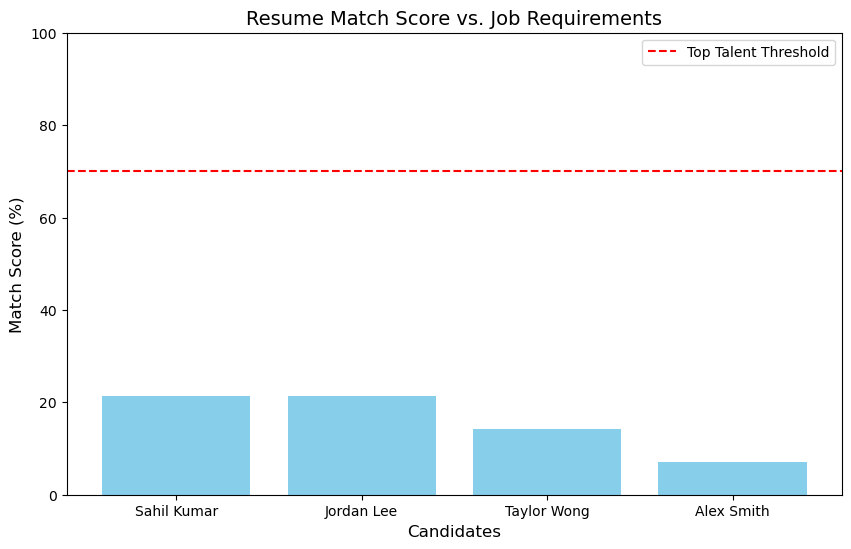

In [41]:
import matplotlib.pyplot as plt

# 1. Set the size of the chart
plt.figure(figsize=(10, 6))

# 2. Create a bar chart
# We use the names for the bottom (x) and the scores for the height (y)
plt.bar(df['Candidate_Name'], df['Match_Score'], color='skyblue')

# 3. Add a 'Goal Line' (70% match is usually a great candidate)
plt.axhline(y=70, color='red', linestyle='--', label='Top Talent Threshold')

# 4. Add labels and a title
plt.xlabel('Candidates', fontsize=12)
plt.ylabel('Match Score (%)', fontsize=12)
plt.title('Resume Match Score vs. Job Requirements', fontsize=14)
plt.ylim(0, 100) # Ensure the scale is always 0-100
plt.legend()

# 5. Show the plot
plt.show()